# Use of Fatal Force by the US Police

In the United States, use of deadly force by police has been a high-profile and contentious issue. 1000 people are shot and killed by US cops each year. The ever-growing argument is that the US has a flawed Law Enforcement system that costs too many innocent civilians their lives. In this project, we will analyze one of America’s hottest political topics, which encompasses issues ranging from institutional racism to the role of Law Enforcement personnel in society.

We will use 5 data sets in this study. Four of them describes demographics of cities in the US (city data sets) while the remaining one records the fatal incidents (police data set).

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pickle

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

## Data Preprocessing

In [ ]:
education = pd.read_csv('data/education.csv', encoding = "ISO-8859-1")
income = pd.read_csv('data/income.csv', encoding = "ISO-8859-1")
poverty = pd.read_csv('data/poverty.csv', encoding = "ISO-8859-1")
race = pd.read_csv('data/share_race_by_city.csv', encoding = "ISO-8859-1")
test = pd.read_csv('data/police_killings_test.csv', encoding = "ISO-8859-1")
train = pd.read_csv('data/police_killings_train.csv', encoding = "ISO-8859-1")

## Exploratory Data Analysis

We first inspect and clean null data.

In [ ]:
train.isnull().sum()

id                          0
name                        0
date                        0
manner_of_death             0
armed                       6
age                        37
gender                      0
race                       91
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       27
body_camera                 0
dtype: int64

There are some are null/nan values, we can look at the dataset to find reasonable values to fill these with.

In [ ]:
train.shape

(2028, 14)

In [ ]:
train.info

<bound method DataFrame.info of         id                   name      date   manner_of_death       armed  \
0        3             Tim Elliot  02/01/15              shot         gun   
1        4       Lewis Lee Lembke  02/01/15              shot         gun   
2        5     John Paul Quintero  03/01/15  shot and Tasered     unarmed   
3        8        Matthew Hoffman  04/01/15              shot  toy weapon   
4        9      Michael Rodriguez  04/01/15              shot    nail gun   
...    ...                    ...       ...               ...         ...   
2023  2256   Jeremy Lopez-Robledo  24/01/17              shot       knife   
2024  2257    Jonathan David Sper  24/01/17              shot     unarmed   
2025  2258  Jose Efrain Rodriguez  24/01/17  shot and Tasered         gun   
2026  2259          Ramon Milanez  24/01/17              shot         gun   
2027  2260       Micah R. Lambert  25/01/17              shot     vehicle   

       age gender race             city sta

In [ ]:
train.describe()

,id,age
count,2028.000000,1991.000000
mean,1170.653846,36.580613
std,635.377106,12.886299
min,3.000000,6.000000
25%,633.750000,27.000000
50%,1170.500000,34.000000
75%,1719.250000,45.000000
max,2260.000000,86.000000


In [ ]:
train.nunique()

id                         2028
name                       2013
date                        705
manner_of_death               2
armed                        65
age                          71
gender                        2
race                          6
city                       1194
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

In [ ]:
train['armed'].value_counts()

gun                                 1114
knife                                304
unarmed                              148
vehicle                              125
undetermined                          91
                                    ... 
bean-bag gun                           1
baseball bat and fireplace poker       1
straight edge razor                    1
hand torch                             1
pole and knife                         1
Name: armed, Length: 65, dtype: int64

The missing values for the armed column can reasonably be replaced with 'undetermined'

In [ ]:
train['age'].value_counts()

31.0    79
25.0    77
36.0    77
29.0    74
30.0    62
        ..
80.0     1
14.0     1
82.0     1
13.0     1
73.0     1
Name: age, Length: 71, dtype: int64

For age, the missing values can be imputed with the median value. Tis is reasonable becasue unlike the mean, median is a measure of central tendancy that is not greatly influenced by the outliers.

In [ ]:
train['flee'].value_counts()

Not fleeing    1387
Car             300
Foot            239
Other            75
Name: flee, dtype: int64

The missing values for the armed column can reasonably be replaced with 'undetermined'

In [ ]:
train['race'].value_counts()

W    996
B    507
H    348
A     31
O     28
N     27
Name: race, dtype: int64

In [ ]:
race

,Geographic Area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


For race, we see that there are 6 unique values other than the null/nan values. These are indicated by:
*   W  -  White
*   B  -  Black or African American
*   H  -  Hispanic or Latino
*   A  -  Asian or Other Pacific Islander
*   O  -  Other
*   N  -  American Indian or Alaska Native

These are mostly consistent with the OMB standards, except OMB considers Hispanic or Latino to be an Ethnicity. As we are looking to work with multiple datasets, including the race dataset, we can confirm that the 5 major race categories we are concerned with are indeed indicated as described above. Hence, we can reasonably fill the missing race values with 'O', as it is the best fit among those given. 

In [ ]:
train.shape

(2028, 14)

In [ ]:
test.shape

(507, 14)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    # fill in missing values using fillna()
    df['armed'] = df['armed'].fillna('undetermined')
    df['age'] = df['age'].fillna(df['age'].median())
    df['race'] = df['race'].fillna('O')
    df['flee'] = df['flee'].fillna('Other')
    # should not end up needing to remove any indecies, missing values have been filled in
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

In [ ]:
# clean test and train datasets
train = clean_dataset(train)
test = clean_dataset(test)

### Merging Counts to City Data Sets

By merging the count of fatal incident grouped by city to the city data sets, we can perform linear regression using demographics as independent variables and count as a depedent variable.

There is a discrepancy between the encoding of names between the police data set and city data sets. For example, the former refer LA in California as Los Angeles while the latter uses Los Angeles city.

We also observe that the police data set provide less information because it only has Chicago as a city, while the city data sets have Chicago city, Chicago Heights city and Chicago Ridge village. Assuming that cities bearing similar name should be geographically and demographically close to each other, we shall evenly distribute the number of fatal incidents between them.

In [ ]:
# count the number of incidents grouping by city and state because city names may duplicate
df = pd.concat([train, test], ignore_index=True)
city_count = df.value_counts(['city', 'state']).rename_axis(['City', 'Geographic Area']).reset_index(name='Counts')
city_count

,City,Geographic Area,Counts
0,Los Angeles,CA,39
1,Phoenix,AZ,31
2,Houston,TX,26
3,Chicago,IL,25
4,Las Vegas,NV,21
...,...,...,...
1529,Knox,IN,1
1530,Kirkland,WA,1
1531,Kiowa,OK,1
1532,Kinston,NC,1


In [ ]:
# merge education/poverty/race based on city
city = education.merge(income, on=['Geographic Area', 'City']).merge(poverty, on=['Geographic Area', 'City']).merge(race, on=['Geographic Area', 'City'])
city

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,11207,78.8,67.2,30.2,0,0,1.6
1,AL,Abbeville city,69.1,25615,29.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,78.9,42575,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,81.4,37083,30.7,99.1,0.1,0,0.1,0.4
4,AL,Akron town,68.6,21667,42,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...,...,...,...
29110,WY,Woods Landing-Jelm CDP,100,NaN,18.6,95.9,0,0,2.1,0
29111,WY,Worland city,85.6,41523,15.3,89.9,0.3,1.3,0.6,16.6
29112,WY,Wright town,89.2,77114,5.9,94.5,0.1,1.4,0.2,6.2
29113,WY,Yoder town,79.4,37500,5.4,97.4,0,0,0,4


In [ ]:
def merge_count(record):
    # find record(s) matching both name and state
    match_city = city_total['City'].str.startswith(record['City'])
    match_state = city_total['Geographic Area'] == record['Geographic Area']
    match_both = np.logical_and(match_city, match_state)
    # count the number of True
    length = np.count_nonzero(match_both)
    if length == 1:     # if unique
        city_total.loc[match_both, 'Counts'] = record['Counts']
    elif length > 1:    # if multiple, take average
        count = record['Counts']/length
        city_total.loc[match_both, 'Counts'] = count

city_total = city.copy()    # changes to city_total will not affect city
city_total['Counts'] = 0
city_count.apply(merge_count, axis=1)
city_count

,City,Geographic Area,Counts
0,Los Angeles,CA,39
1,Phoenix,AZ,31
2,Houston,TX,26
3,Chicago,IL,25
4,Las Vegas,NV,21
...,...,...,...
1529,Knox,IN,1
1530,Kirkland,WA,1
1531,Kiowa,OK,1
1532,Kinston,NC,1


In [ ]:
# sorted list of city totals based on insidents in th city
city_total.sort_values(by='Counts', ascending=False)

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Counts
2701,CA,Los Angeles city,75.5,50205,22.1,49.8,9.6,0.7,11.3,48.5,39.0
1198,AZ,Phoenix city,80.7,47326,23.1,65.9,6.5,2.2,3.2,40.8,31.0
25036,TX,Houston city,76.7,46187,22.5,50.5,23.7,0.7,6,43.8,26.0
15596,NV,Las Vegas city,83.3,50202,17.5,62.1,11.1,0.7,6.1,31.5,21.0
25744,TX,San Antonio city,81.4,46744,19.8,72.6,6.9,0.9,2.4,63.2,20.0
...,...,...,...,...,...,...,...,...,...,...,...
10067,KY,Munfordville city,70.6,21800,40.9,85.2,11.8,0.1,0.6,1.4,0.0
10066,KY,Muldraugh city,79,23889,38.6,85.5,7,0.5,0.5,2.9,0.0
10065,KY,Mount Washington city,90.6,62030,10.8,97.1,0.6,0.1,0.4,1.6,0.0
10064,KY,Mount Vernon city,72,20651,37.8,98.4,0.3,0.2,0,0.6,0.0


### Merging City Data Sets to the Police Data Set

By merging the city demographics to the police data set, we can append background information to each of the incident. In this study, we will use various city demographics as independent variables to predict the race of victim.

In [ ]:
fields = ['percent_completed_hs', 'Median Income', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

def merge_city(record):
    # find record(s) matching both city and state
    match_city = city['City'].str.startswith(record['city'])
    match_state = city['Geographic Area'] == record['state']
    match_both = np.logical_and(match_city, match_state)
    match = city.loc[match_both]
    # assign the mean of city demographics to the police data set
    for field in fields:
        record.loc[field] = pd.to_numeric(match[field], errors='coerce').mean()
    return record[fields]

train[fields] = train.apply(merge_city, axis=1)
test[fields] = test.apply(merge_city, axis=1)

In [ ]:
train

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,flee,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,...,Not fleeing,False,80.1,37072.0,28.6,78.9,0.8,3.7,1.1,19.2
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,...,Not fleeing,False,88.1,65765.0,14.9,70.9,2.6,1.0,8.9,21.1
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,Not fleeing,False,87.5,45947.0,17.3,71.9,11.5,1.2,4.8,15.3
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,...,Not fleeing,False,87.0,81294.0,13.2,48.5,6.1,0.5,33.3,15.1
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,...,Not fleeing,False,76.3,47791.0,16.6,76.5,0.9,1.2,0.9,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,...,Foot,True,85.5,41330.0,24.4,75.3,2.4,1.7,1.6,56.8
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,...,Not fleeing,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,...,Not fleeing,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,H,Kuna,ID,...,Car,False,92.9,57417.0,13.2,91.2,0.6,0.8,0.7,8.6


Since some rows in the police data set do not have corresponding cities, they will have NaN values which needs to be cleaned.

In [ ]:
train.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
percent_completed_hs       207
Median Income              212
poverty_rate               207
share_white                207
share_black                207
share_native_american      207
share_asian                207
share_hispanic             207
dtype: int64

In [ ]:
train.nunique()

id                         2028
name                       2013
date                        705
manner_of_death               2
armed                        65
age                          71
gender                        2
race                          6
city                       1194
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
percent_completed_hs        371
Median Income              1064
poverty_rate                392
share_white                 561
share_black                 416
share_native_american       122
share_asian                 202
share_hispanic              443
dtype: int64

In [ ]:
train.shape

(2028, 22)

The missing values are present for the poverty rate, education, income, and race columns. Among all the given colums, the Geographic area or the State can best help us determine appropriate imputation values. For this data, linear interpolation works best, as higher order functions yield negative values. All the missing values can be filled using this method.

In [ ]:
train.nunique()

id                         2028
name                       2013
date                        705
manner_of_death               2
armed                        65
age                          71
gender                        2
race                          6
city                       1194
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
percent_completed_hs        371
Median Income              1064
poverty_rate                392
share_white                 561
share_black                 416
share_native_american       122
share_asian                 202
share_hispanic              443
dtype: int64

In [ ]:
def clean_merged(df):
    assert isinstance(df, pd.DataFrame)
    # fill in missing values using interpolate()
    df1 = pd.DataFrame()
    for st in df['state'].unique():
      df1 = pd.concat([df[df['state'] == st].interpolate(method = 'linear'), df1])
    for var in ['age', 'percent_completed_hs', 'Median Income', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']:
      q1, q3 = df1[var].quantile([0.25, 0.75])
      low, high = q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)
      df1[var] = df1[var].clip(low, high)
    
    for var in ['age', 'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']:
      low, high = 0, 100
      df1[var] = df1[var].clip(low, high)
      
    # should not end up needing to remove any indecies, missing values have been filled in
    indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(1)
    return df1[indices_to_keep]

In [ ]:
train = clean_merged(train)
test = clean_merged(test)

In [ ]:
train.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
percent_completed_hs       0
Median Income              0
poverty_rate               0
share_white                0
share_black                0
share_native_american      0
share_asian                0
share_hispanic             0
dtype: int64

In [ ]:
train.to_csv('processed/train.csv', index=False)
test.to_csv('processed/test.csv', index=False)

Lets explore how the fatal police shootings vary based on the different geographic loactions. The merged dataset has 51 unique Geogrphic Areas. These include Washington DC in addition to the 50 states within the United States.

[Text(0.5, 1.0, 'Counts of fatal police shootings by state')]

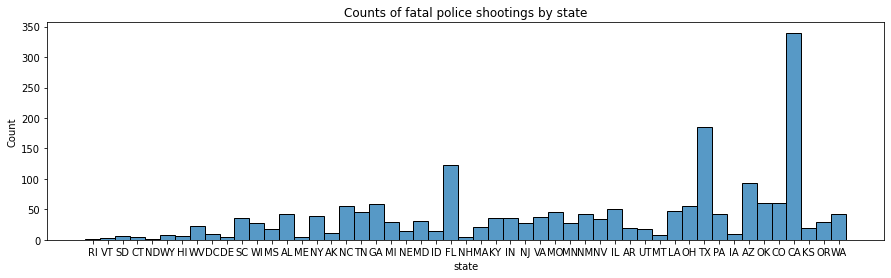

In [ ]:
fig, ax = plt.subplots(figsize =  (15, 4))
sns.histplot(train['state'], ax = ax).set(title = 'Counts of fatal police shootings by state')

In [ ]:
train['state'].value_counts().head(1)

CA    340
Name: state, dtype: int64

CA has the most fata police shootings, with a total of 340 counts in our train dataset

In [ ]:
mx = 0
city = ""
for st in train['state'].unique():
  curr = train[train['state'] == st]['city'].value_counts().max()
  if curr > mx:
    mx = curr
    city = train[train['state'] == st]['city'].value_counts().head(1)
city

Los Angeles    31
Name: city, dtype: int64

Next, we look at the cities in the dataset, to determine which city may be considered the most dangerous. Looking through cities in each state (due to possible duplicate city names over mulitple states), we find that Los Angeles has the highest count of all cities in our dataset, 284.

In [ ]:
train['armed'].value_counts().head(1)

gun    1109
Name: armed, dtype: int64

In the train data, a gun is the most common way of being armed. The counts of some other weapons used is given below.

In [ ]:
train['armed'].value_counts()

gun               1109
knife              304
unarmed            148
vehicle            123
undetermined        97
                  ... 
sharp object         1
glass shard          1
metal object         1
cordless drill       1
piece of wood        1
Name: armed, Length: 65, dtype: int64

With the available data, we can also explore the age and race statistics in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of incident counts based on age')]

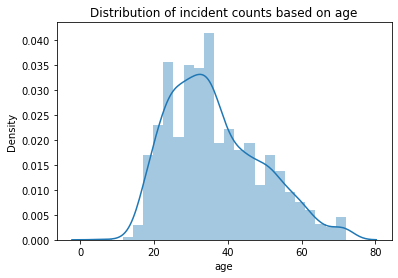

In [ ]:
sns.distplot(train['age']).set(title = 'Distribution of incident counts based on age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Distribution of incident counts based on age')]

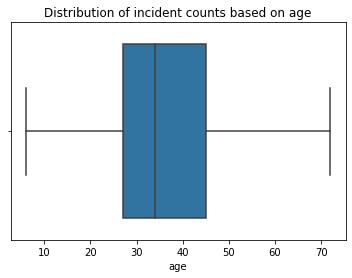

In [ ]:
sns.boxplot(train['age']).set(title = 'Distribution of incident counts based on age')

We see that the age distribution of the victims is unimodal, with most victims being somewhere between 25 to 45. The number of victims increase with age up until age 20. After a brief dip, the victim density peaks for victims around the age of 30. There is a steady decline in the number of victims for victims older than age 40. Let'see how the distrubution compares to the age distributions of different races.

In [ ]:
train['race'].value_counts()

W    991
B    506
H    348
O    118
A     31
N     26
Name: race, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of incident counts based on age for White victims')]

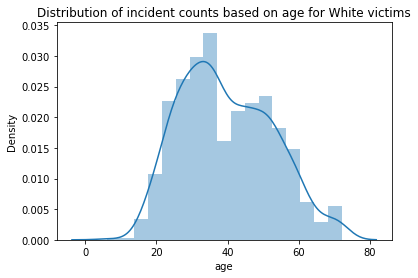

In [ ]:
sns.distplot(train[train['race'] == 'W']['age']).set(title = 'Distribution of incident counts based on age for White victims')

The distribution of white victims is similar to the overall distrbution of victims based solely on age. The number of victims increases with increas in age from around age 20 to around age 30, where the desity peaks. Following another small peak around age 50, the density steadily decreases.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of incident counts based on age for Black or African American victims')]

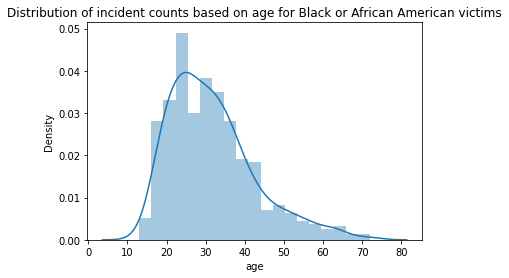

In [ ]:
sns.distplot(train[train['race'] == 'B']['age']).set(title = 'Distribution of incident counts based on age for Black or African American victims')

This distribution is similar to the overall age distribution, except the desity of the victims for this distribution peaks at around age 20. There is a decreases in the victim density following age 30 for this distribution, like the overall age distribution of the victims.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of incident counts based on age for Hispanic or Latino victims')]

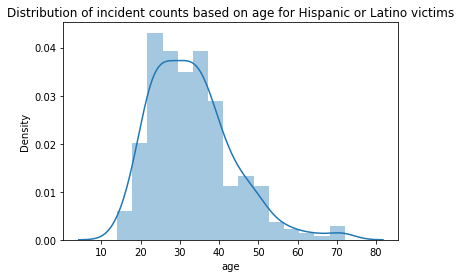

In [ ]:
sns.distplot(train[train['race'] == 'H']['age']).set(title = 'Distribution of incident counts based on age for Hispanic or Latino victims')

This distribution is similar to the overall age distribution, except the desity of the victims for this distribution peaks between age 20 and 30. There is a decreases in the victim density following age 30 for this distribution, like the overall age distribution of the victims.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of incident counts based on age for Asian or Other Pacific Islander victims')]

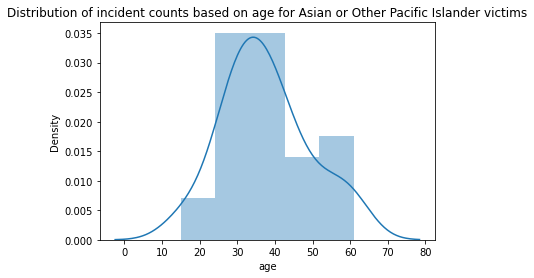

In [ ]:
sns.distplot(train[train['race'] == 'A']['age']).set(title = 'Distribution of incident counts based on age for Asian or Other Pacific Islander victims')

With only 31 victims, this distribution seems a bit different compared to the overall distribution. However, this is mainly due to the low number of victims. This distribution also has a peak at around age 30.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of incident counts based on age for American Indian or Alaska Native victims')]

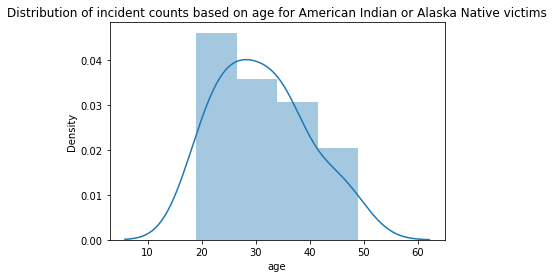

In [ ]:
sns.distplot(train[train['race'] == 'N']['age']).set(title = 'Distribution of incident counts based on age for American Indian or Alaska Native victims')

With only 26 victims, this distribution seems a bit different compared to the overall distribution. However, this is mainly due to the low number of victims. This distribution also experiences a peak following age 20 and age 30.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of incident counts based on age for victims of other races')]

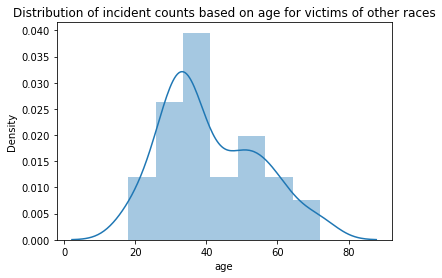

In [ ]:
sns.distplot(train[train['race'] == 'O']['age']).set(title = 'Distribution of incident counts based on age for victims of other races')

This distribution of victims is similar to the overall distrbution of victims based solely on age. The number of victims increases with increas in age from around age 20 to past age 30, where the desity peaks. Following another small peak around age 50, the density steadily decreases.

[Text(0.5, 1.0, 'Distribution of incident counts based on age, seperated by race')]

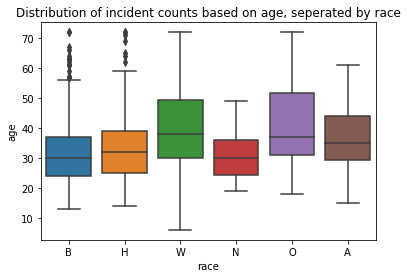

In [ ]:
sns.boxplot(x='race', y="age", data = train).set(title = 'Distribution of incident counts based on age, seperated by race')

Total number of people killed per race:

In [ ]:
train['race'].value_counts()

W    991
B    506
H    348
O    118
A     31
N     26
Name: race, dtype: int64

We see that the race of the many the victims is white (49.1%), and the age distribution of the victims of this race is similar to the age distribution of all races combined, except this distribution has a small peak in victim density following age 40. The larger number of victims with greater age seems to be the reason for the higher mean age of victims in this distribution. Victims of the black race account for 25.0% of the victims in this dataset. The age distribution for this race is also similar, but it has a smaller range. This distribution experiences a peak for victims in their early 20s. The victims of Other races are next, accounting for 17.2% of the victims. This distribution is similar to the distribution of white victims, except this distribution does not have younger victims (less than age 20). The remaining races have little impact on the overall age distribution due to their low counts. Hispanic victims account for about 5.8%, Asians 1.5%, and Native American 1.3%. However, they seems to follow similar distributions with the mean victim age being in early 30s. Native Americans seem to have the smallest range, which can be explained by the lower number of victims of this race and the unimodal age distribution of victims.

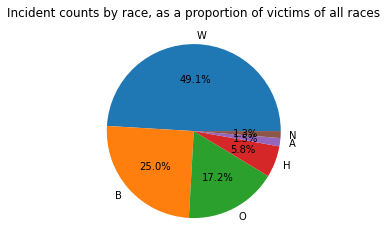

In [ ]:
plt.pie(train['race'].value_counts(), labels=test['race'].value_counts().keys(), autopct='%1.1f%%')
plt.title('Incident counts by race, as a proportion of victims of all races')
plt.show()

As a proportion of respective races, the number of people killed per race seems to be reasonable. The proportion of victims of a certain race seem to mimic the proportion of individuals of the respective race within the US. For example, the larger number of White victims can eb explained by the larger proportion of the citizens being White. Similary, lower number of Native American victims can be explained by the smaller proportion of Native American citizens.

We plot the columns to study the distribution of features.

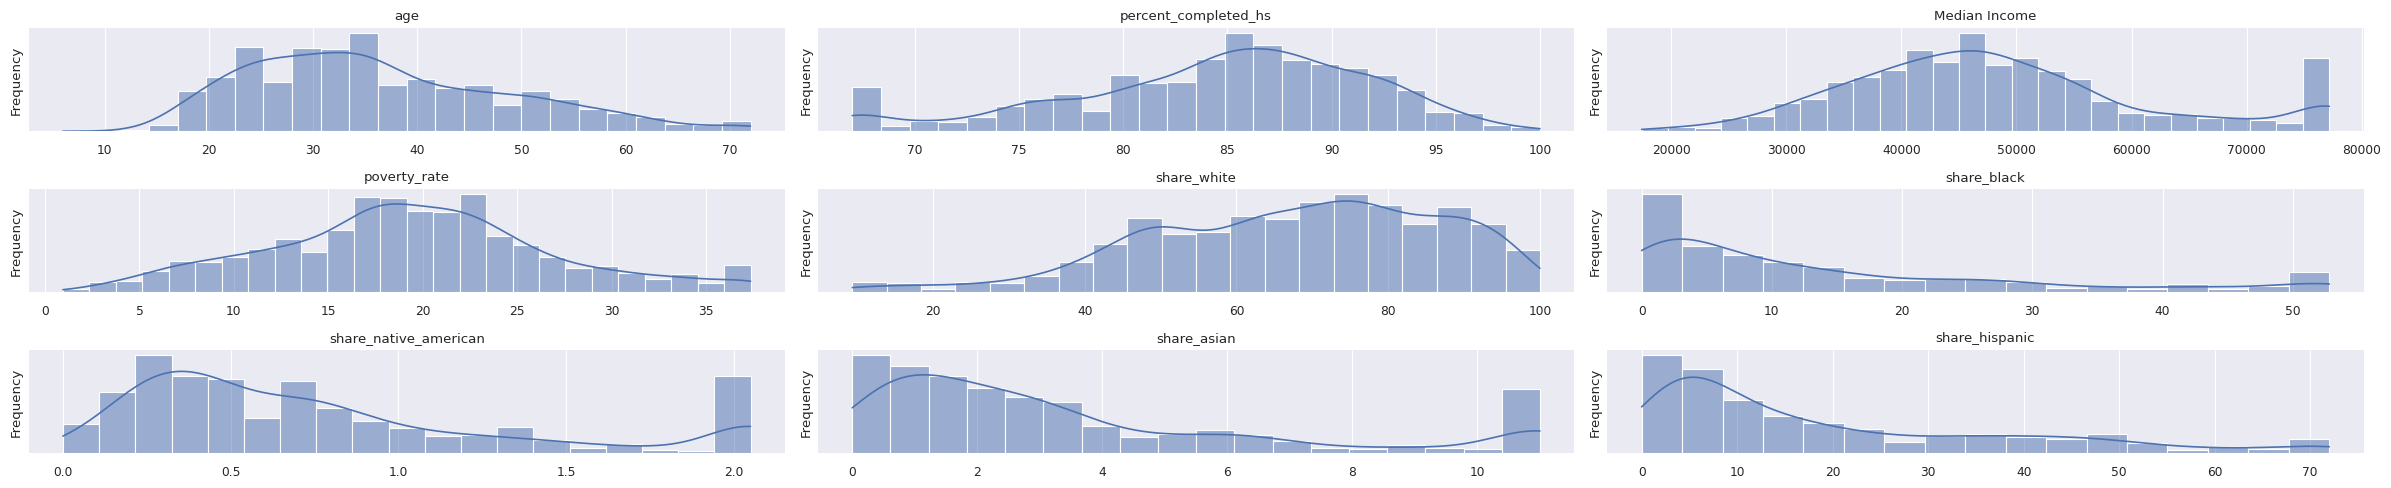

In [ ]:
columns = ['age', 'percent_completed_hs', 'Median Income', 'poverty_rate', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
fig = plt.figure(dpi=100, figsize=(24, 16), tight_layout=True)
sns.set_theme()
sns.set_context("paper")
for i, col in enumerate(columns):
  ax = fig.add_subplot(10, 3, i + 1)
  sns.histplot(X_train[col], kde=True)
  ax.set_title(col)
  ax.set_yticks([])
  ax.set_ylabel("Frequency")
  ax.set_xlabel(None)
  ax.tick_params(left=False, bottom=False)
  for ax, spine in ax.spines.items():
    spine.set_visible(False)

We visualise the correlation of columns with a heatmap.

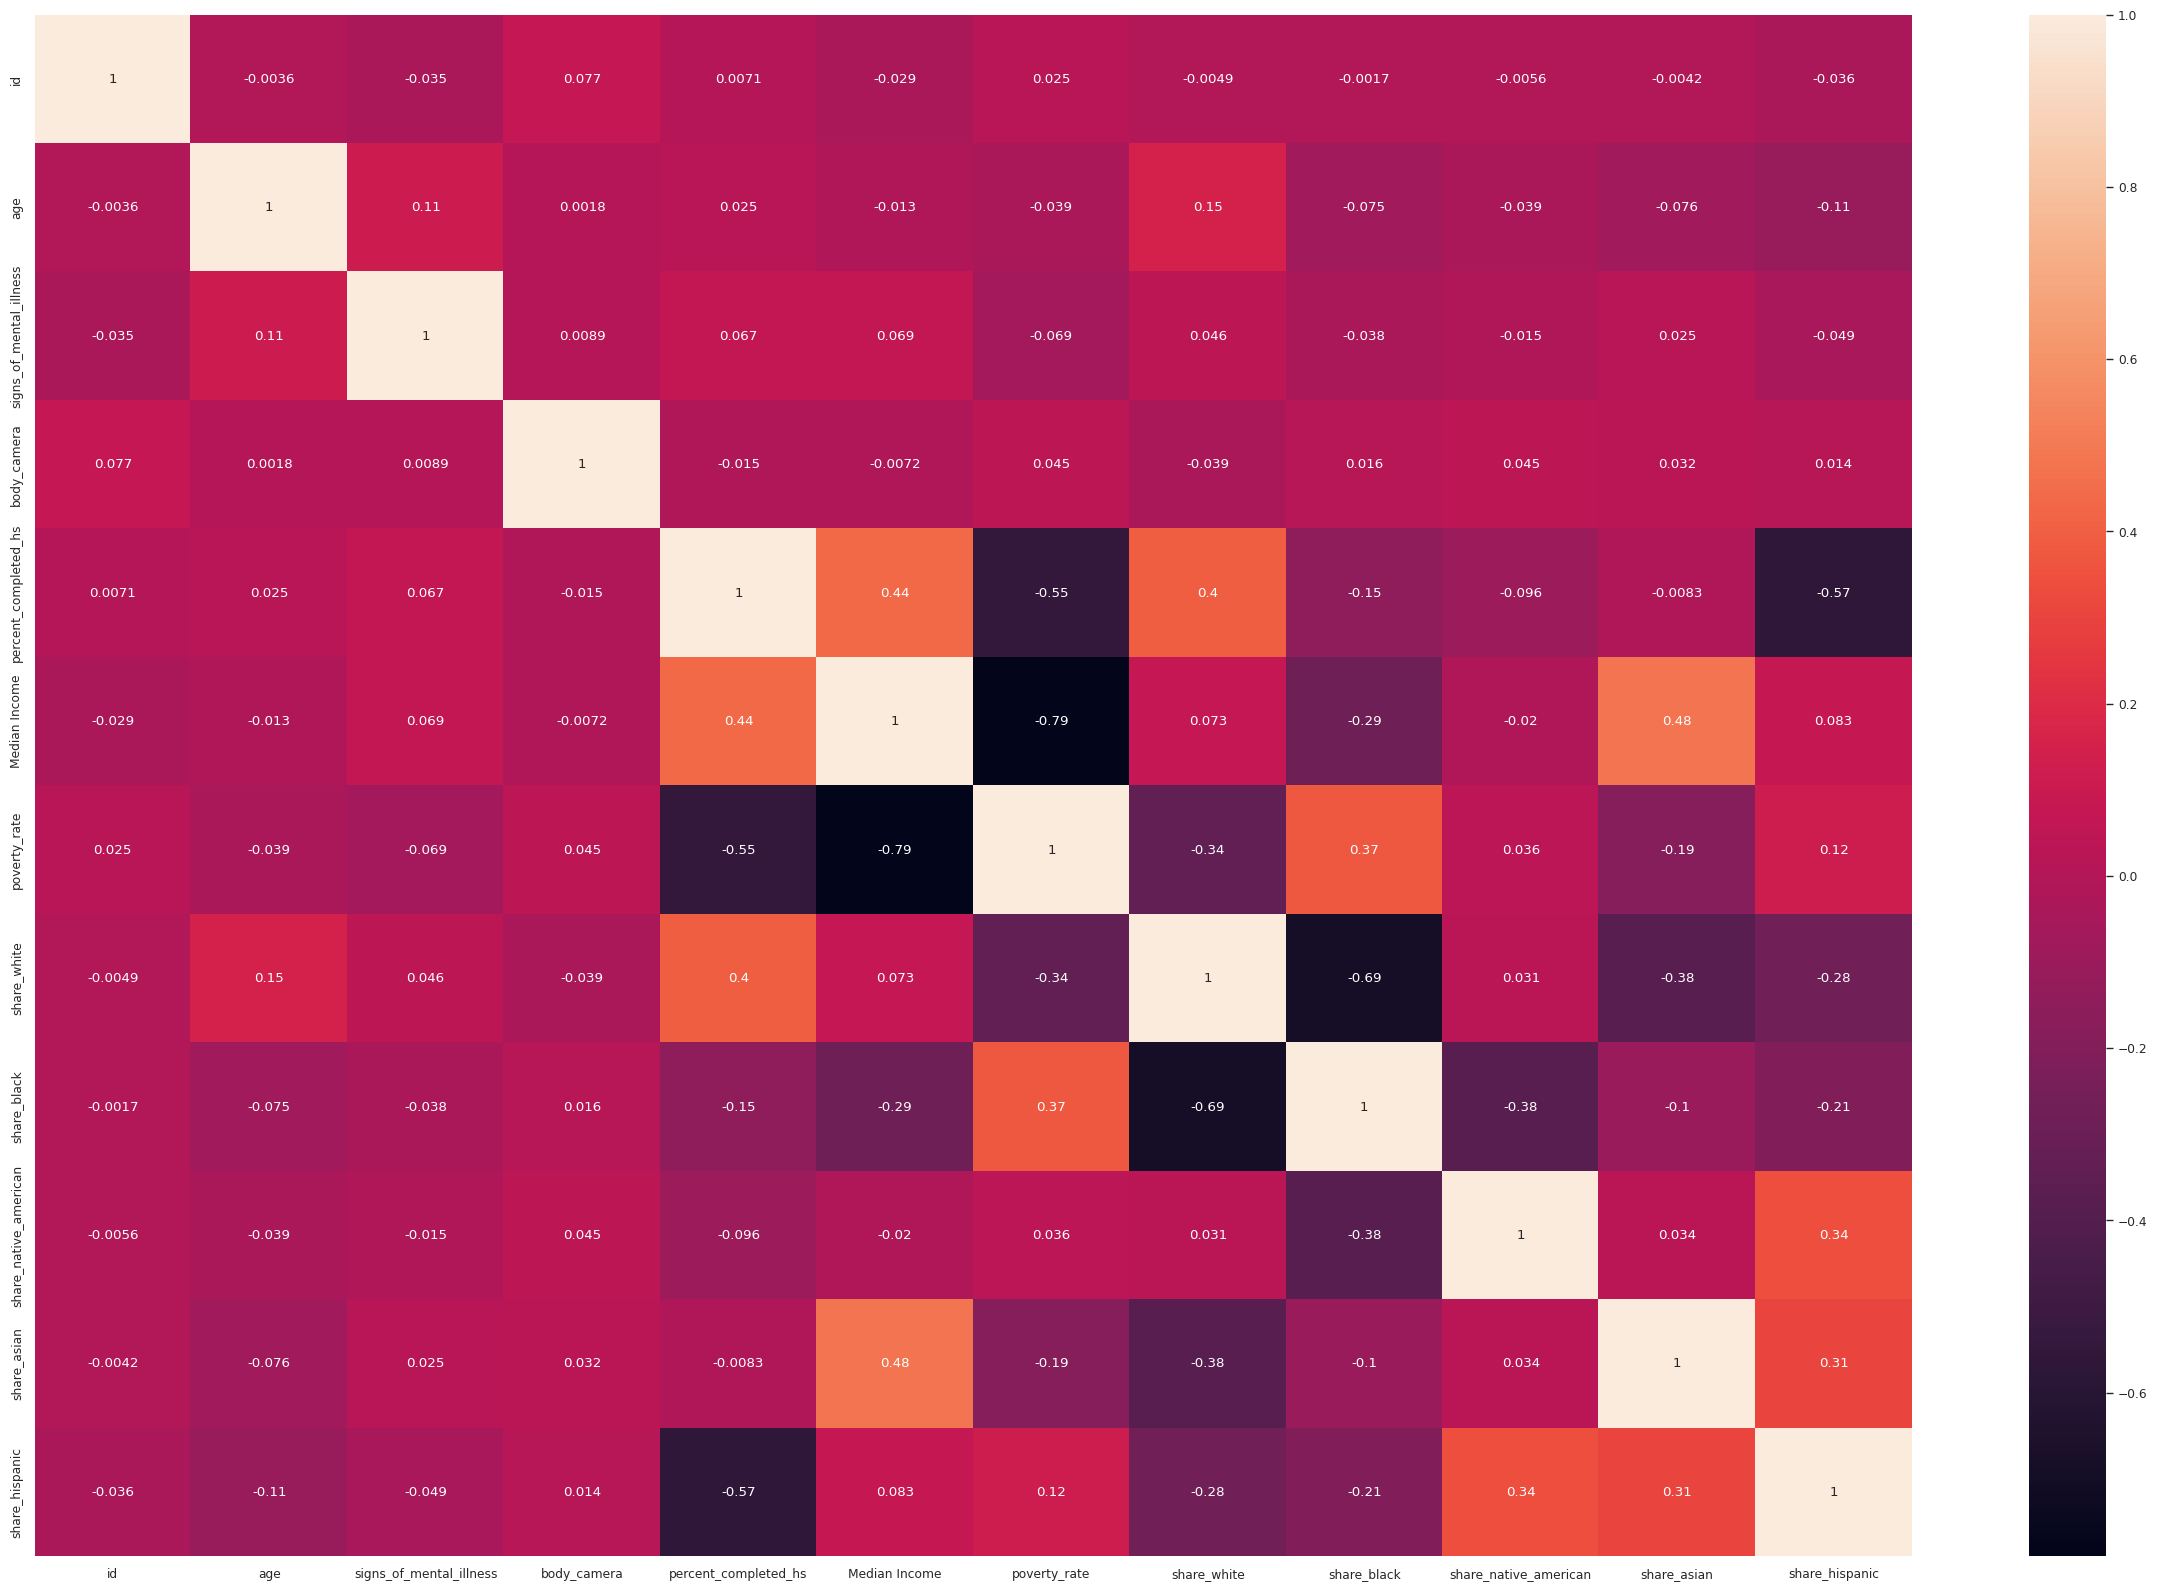

In [ ]:
fig = plt.figure(dpi=100, figsize=(24, 16), tight_layout=True)
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

### Recoding Features

To make the features interpretable to the classifier, we create dummy columns for categorical variables. We then proceed to separate the independent and the dependent variables in the data set, while also eliminate columns that are irrelevant to the study. We also eliminate city and state information because they are already represented by other parameters in the data set.

There are too many unique values for the column armed. Since we only study whether the victim is armed or not, we can convert all values other than 'unarmed' and 'undetermined' to 'armed'.

In [ ]:
train['armed'].value_counts()

gun               1109
knife              304
unarmed            148
vehicle            123
undetermined        97
                  ... 
sharp object         1
glass shard          1
metal object         1
cordless drill       1
piece of wood        1
Name: armed, Length: 65, dtype: int64

In [ ]:
train['armed'].where(np.logical_or(train['armed'] == 'unarmed', train['armed'] == 'undetermined'), 'armed', inplace=True)
test['armed'].where(np.logical_or(test['armed'] == 'unarmed', test['armed'] == 'undetermined'), 'armed', inplace=True)
train['armed'].value_counts()

armed           1775
unarmed          148
undetermined      97
Name: armed, dtype: int64

In [ ]:
X_train = pd.get_dummies(train.drop(columns=['id', 'name', 'race', 'date', 'city', 'state']))
y_train = train['race']
X_test = pd.get_dummies(test.drop(columns=['id', 'name', 'race', 'date', 'city', 'state']))
y_test = test['race']

In [ ]:
X_train

,age,signs_of_mental_illness,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,...,armed_undetermined,gender_F,gender_M,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
1226,24.0,False,False,78.400000,41789.000000,20.600000,66.500000,13.400000,0.600000,1.500000,...,0,0,1,1,0,0,0,1,0,0
1431,72.0,False,False,89.400000,69054.000000,6.800000,95.700000,1.200000,0.100000,1.000000,...,0,0,1,1,0,0,1,0,0,0
968,56.0,False,True,89.000000,44671.000000,24.800000,88.900000,3.900000,0.300000,3.600000,...,0,0,1,1,0,0,0,0,1,0
1217,72.0,True,True,89.000000,44671.000000,24.800000,88.900000,3.900000,0.300000,3.600000,...,0,0,1,0,1,0,0,0,1,0
1684,29.0,False,True,85.000000,45974.000000,26.100000,82.600000,6.900000,0.300000,6.200000,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,59.0,False,False,86.866667,54758.333333,17.166667,61.766667,11.233333,1.533333,10.533333,...,0,0,1,0,0,1,0,0,0,1
1876,38.0,False,False,87.600000,52042.000000,18.000000,64.900000,11.200000,1.800000,8.200000,...,0,0,1,1,0,0,0,0,1,0
1914,44.0,False,False,88.100000,49578.000000,17.600000,74.600000,4.100000,1.400000,7.800000,...,0,0,1,0,1,0,0,0,1,0
1916,37.0,False,False,96.500000,77178.750000,7.900000,92.400000,0.900000,0.800000,2.000000,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
y_train

1226    B
1431    H
968     W
1217    W
1684    N
       ..
1809    O
1876    B
1914    N
1916    W
1993    W
Name: race, Length: 2020, dtype: object

## Prediting Race of Victims

We now use a mixture of the features to predict the race of victims in fatal incidents.

### Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=10000, multi_class='multinomial')
clf.fit(X_train, y_train)
with open('output/logreg.pkl','wb') as f:
    pickle.dump(clf,f)

In [ ]:
print(f'Train accuracy = {clf.score(X_train, y_train)}.')
print(f'Test accuracy = {clf.score(X_test, y_test)}.')

Train accuracy = 0.6168316831683168.
Test accuracy = 0.508.


Cross validation is implemented to reduce overfitting.

In [ ]:
clf = LogisticRegressionCV(max_iter=10000, multi_class='multinomial', cv=5)
clf.fit(X_train, y_train)
with open('output/logregCV.pkl','wb') as f:
    pickle.dump(clf,f)
print(f'Train accuracy = {clf.score(X_train, y_train)}.')
print(f'Test accuracy = {clf.score(X_test, y_test)}.')

Train accuracy = 0.6138613861386139.
Test accuracy = 0.504.


We can see that the training accuracy of the model is about 0.6139, and the test accuracy of the model is about 0.504. This is better than a baseline random model with a mean accuracy of about 0.1667.

### Tree Classifier

Train accuracy = 0.6202970297029703.
Test accuracy = 0.482.


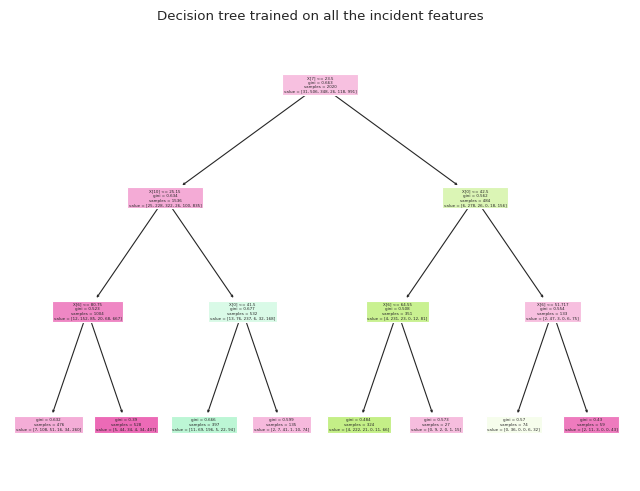

<Figure size 432x288 with 0 Axes>

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
print(f'Train accuracy = {clf.score(X_train, y_train)}.')
print(f'Test accuracy = {clf.score(X_test, y_test)}.')

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the incident features")
plt.show()
plt.savefig('incident_tree.png')

The large discrepancy between the accuracy of test and train data set respectively shows that the decision tree faces overfitting. We then turn to random forest to solve this problem by ensemble method.

In [ ]:
clf = RandomForestClassifier(max_depth=10, class_weight='balanced_subsample')
clf.fit(X_train, y_train)
with open('output/randomforest.pkl','wb') as f:
    pickle.dump(clf,f)
print(f'Train accuracy = {clf.score(X_train, y_train)}.')
print(f'Test accuracy = {clf.score(X_test, y_test)}.')

Train accuracy = 0.8707920792079208.
Test accuracy = 0.486.


We can see that the training accuracy of the model is about 0.8708, and the test accuracy of the model is about 0.486. This is better than a baseline random model with a mean accuracy of about 0.1667.

### KNN Classifier

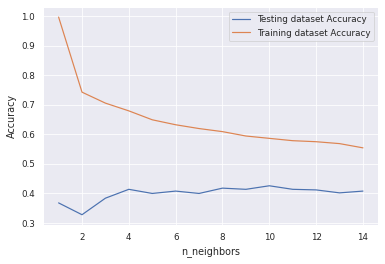

In [ ]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
with open('output/knn.pkl','wb') as f:
    pickle.dump(knn,f)

print(f'Train accuracy = {knn.score(X_train, y_train)}.')
print(f'Test accuracy = {knn.score(X_test, y_test)}.')

Train accuracy = 0.5544554455445545.
Test accuracy = 0.408.


We can see that the training accuracy of the model is about 0.5544, and the test accuracy of the model is about 0.408. This is better than a baseline random model with a mean accuracy of about 0.1667. We did not expect this to perform poorly compared tot he others, as knn is a good non linear classifier model which uses neighboring data values to predict the result.

## Predicting Count of Incidents

In this section, we would like to use the count of incidents by city as a dependent variable in regression to investigate what factors contribute to a high count.

In [ ]:
zero_count = city_total.loc[city_total['Counts'] == 0].shape[0]
print(f'There are {zero_count} cities with no fatal incident.')
print(f'They account for {zero_count/city_total.shape[0]*100}% of all the cities.')

There are 27675 cities with no fatal incident.
They account for 95.05409582689336% of all the cities.


We remove cities without accidents from the data set so that a relationship between cities and counts can be better formulated. Otherwise, a dummy regressor which contantly outputs 0 would achieve a good MSE.

In [ ]:
# drop city without accidents
city = city_total.loc[city_total['Counts'] != 0]
# drop city names and clean non-numerical data
city = city.drop(columns=['Geographic Area', 'City']).apply(pd.to_numeric, errors='coerce').dropna()
# scale columns
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(city.drop(columns='Counts')))
y = city['Counts']
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_train

,0,1,2,3,4,5,6,7
389,0.702381,0.095789,0.311359,0.494980,0.445918,0.003012,0.008969,0.087269
741,0.867347,0.125889,0.192698,0.914659,0.005102,0.038153,0.005979,0.034908
394,0.001701,0.076894,0.445233,0.429719,0.192857,0.010040,0.002990,0.776181
1382,0.840136,0.161903,0.130832,0.946787,0.023469,0.005020,0.008969,0.016427
837,0.906463,0.206285,0.159229,0.873494,0.005102,0.028112,0.016442,0.131417
...,...,...,...,...,...,...,...,...
471,0.680272,0.183102,0.151116,0.706827,0.188776,0.004016,0.014948,0.130390
693,0.926871,0.453293,0.070994,0.553213,0.258163,0.004016,0.170404,0.081109
810,0.670068,0.125524,0.204868,0.841365,0.010204,0.016064,0.013453,0.116016
1256,0.522109,0.108253,0.276876,0.358434,0.415306,0.007028,0.088191,0.303901


### Linear Regression

The low R2 score for linear regression suggests that a linear relationship cannot be established between city features and counts. However, on the scale of 1 to 35 (the highest count), the mean absolute error is acceptable.

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(f'Train R2 = {reg.score(X_train, y_train)}.')
print(f'Test R2 = {reg.score(X_test, y_test)}.')
print(f'Test MAE = {mean_absolute_error(y_test, reg.predict(X_test))}.')
print(f'Test MSE = {mean_squared_error(y_test, reg.predict(X_test))}.')

Train R2 = 0.05316277146809778.
Test R2 = 0.04879420015724578.
Test MAE = 0.9705357348350244.
Test MSE = 5.553461755443683.


### Neural Network

A neural network can model non-linear relationships between city features and counts.

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 2670)              24030     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2671      
Total params: 26,773
Trainable params: 26,773
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer= 'adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

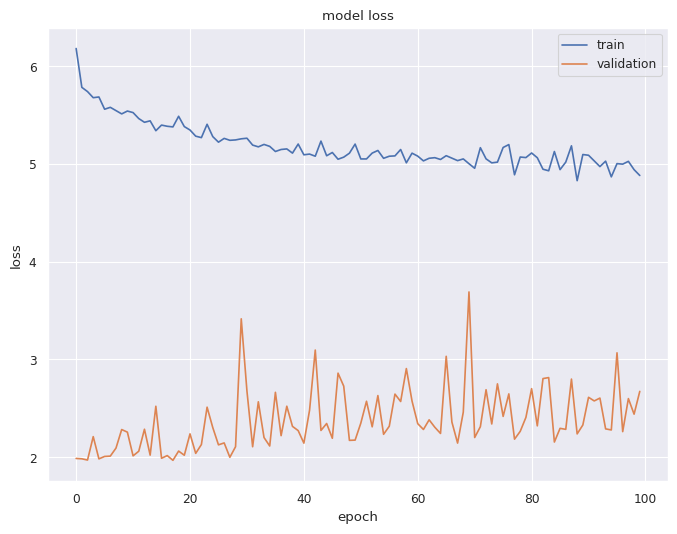

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(f'Test MAE = {mean_absolute_error(y_test, y_pred)}.')
print(f'Test MSE = {mean_squared_error(y_test, y_pred)}.')

Test MAE = 1.002440188024061.
Test MSE = 5.157984823211378.


### SVM Classifier

In [ ]:
clf = SVC(kernel='linear')
 
# fitting x samples and y classes
clf.fit(X_train, preprocessing.LabelEncoder().fit_transform(y_train))
print(f'Train R2 = {clf.score(X_train, preprocessing.LabelEncoder().fit_transform(y_train))}.')
print(f'Test R2 = {clf.score(X_test, preprocessing.LabelEncoder().fit_transform(y_test))}.')
print(f'Test MAE = {mean_absolute_error(preprocessing.LabelEncoder().fit_transform(y_test), clf.predict(X_test))}.')
print(f'Test MSE = {mean_squared_error(preprocessing.LabelEncoder().fit_transform(y_test), clf.predict(X_test))}.')

Train R2 = 0.6781970649895178.
Test R2 = 0.648936170212766.
Test MAE = 1.4851063829787234.
Test MSE = 9.434042553191489.


As we anticipated, the neural network ended up performing similarly to the linear regression. This may be due to possible linear relations between city features and counts. The neural network based model has learnt the relationships between input features and outputs well enough to outperform the linear model. SVM was not as successful in the classification task. This may be because of the dataset being a imbalanced, and the target classes overlapping.